## WeatherPy
#### Analysis
- There appears to be a clear correlation between 0 latitude (closer to the equator) and temperature increase, as we would have expected. 
- There appear to be higher levels of cloudiness between 45 an 65 degree latitude, with the range between 50 and 60 degrees always reporting cloudiness.
- The highest wind speeds were recorded at higher latitudes, suggesting that weather closer to the equator is generally less windy. 

In [6]:
# Dependencies
import os
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import requests
import pandas as pd
import numpy as np
import datetime
import time
from random import uniform
from citipy import citipy
from config import app_id

### Build function and call to generate pool of randomly generated coordinates

In [7]:
# Define function to randomly return geo-coordinates 
def random_latlong():
    '''
    Function: random_latlong
    Returns:  tuple of randomly generated lat and lon values
    '''
    return uniform(-180,180), uniform(-90, 90)

In [8]:
# Define number of coords to generate
num_coords = 3500

# Loop through to generate x number of lat / long pairs 
geocoords_pool = (random_latlong() for x in range(num_coords))

# Add our coordinate tuples to a list
coords_list = []
for coord in geocoords_pool:
   coords_list.append(coord)

### Loop through coordinates list to build list of 500 unique cities

In [9]:
# Define number of cities, cities list, and list to store results
city_pool_count = 800
cp_cities = []

# Loop through our coordinates list and pass each to the Citipy "nearest_city" fuction to get a city
for coordinate_pair in coords_list:   
    # Obtain lat, lon values from current tuple in list
    lat, lon = coordinate_pair
    
    # Call CitiPy function with lat and lon values
    cp_city = citipy.nearest_city(lat, lon)
    
    # Place current city name into our cities list (if it's not already there)
    if (cp_city not in cp_cities):  
        cp_cities.append(cp_city)
        
    # Break out of the loop once we've reached the cities cap
    if (len(cp_cities) == city_pool_count):
        break

print(f"Number of cities: {str(len(cp_cities))}")

Number of cities: 699


### For each city found, call OpenWeatherMap API to build data into JSON data structure

In [10]:
# OpenWeatherMap API base url
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Weather_data list variable
weather_data = []

# Initialize number of cities to process, and error message variables
num_cities_to_process = 500
msg_city_not_found = "city not found"
msg_locked_out = "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"
  
# Loop through our obtained cities
current_city_count = 1
for cp_city in cp_cities:   
    # Build a data object of all city openweatherapi object instances in cities array, tracking city and country code in variables
    city_name = cp_city.city_name
    country_code = cp_city.country_code
        
    # Build params list with our current city name
    params = {
        "q": f"{city_name},{country_code}",
        "units": "IMPERIAL",
        "mode": "json",
        "appid": app_id
    }
    
    # Poll OpenWeatherMap API for weather data
    weather_response = requests.get(base_url, params=params)
    response_json = weather_response.json()
    
    # Once we've run through 60 requests, wait 1 minute before proceeding -- to prevent getting locked out of the free API account
    if (current_city_count % 60 == 0):
        time.sleep(60)

    # Initialize variable to determine what message was returned from API
    message = response_json.get("message", "OK")
  
    # If we are locked out, alert the user and break
    if (message == msg_locked_out):
        print("API key locked out!")
        break
    
    # Make sure this city was actually found in OpenWeatherMap.org's database, before we append it to our dataset  
    elif (message == msg_city_not_found):  
        # If the CityPi city isn't found in OpenWeatherMap's API, continue to next iteration
        continue
    
    else:  
        # Print log of current city being processed
        print(f"Processing record {str(current_city_count)} of {str(num_cities_to_process)} | {city_name}, {country_code}")

        # Append current city's JSON response to our weather_data list
        weather_data.append(response_json)

        # Increment current city
        current_city_count += 1

    # Break out of the loop if we've reached 500 cities
    if (current_city_count == (num_cities_to_process+1)):
        break


Processing record 1 of 500 | ushuaia, ar
Processing record 2 of 500 | hermanus, za
Processing record 3 of 500 | dikson, ru
Processing record 4 of 500 | takoradi, gh
Processing record 5 of 500 | saint-philippe, re
Processing record 6 of 500 | hithadhoo, mv
Processing record 7 of 500 | jamestown, sh
Processing record 8 of 500 | qaanaaq, gl
Processing record 9 of 500 | port alfred, za
Processing record 10 of 500 | san andres, co
Processing record 11 of 500 | pangody, ru
Processing record 12 of 500 | fort-shevchenko, kz
Processing record 13 of 500 | port-gentil, ga
Processing record 14 of 500 | saint-augustin, ca
Processing record 15 of 500 | klerksdorp, za
Processing record 16 of 500 | narsaq, gl
Processing record 17 of 500 | kibondo, tz
Processing record 18 of 500 | renigunta, in
Processing record 19 of 500 | les cayes, ht
Processing record 20 of 500 | tasiilaq, gl
Processing record 21 of 500 | longyearbyen, sj
Processing record 22 of 500 | bredasdorp, za
Processing record 23 of 500 | vi

Processing record 188 of 500 | vladyslavivka, ua
Processing record 189 of 500 | praia da vitoria, pt
Processing record 190 of 500 | wagar, sd
Processing record 191 of 500 | dogondoutchi, ne
Processing record 192 of 500 | taperoa, br
Processing record 193 of 500 | kazerun, ir
Processing record 194 of 500 | rio grande, br
Processing record 195 of 500 | jacareacanga, br
Processing record 196 of 500 | qatana, sy
Processing record 197 of 500 | tabou, ci
Processing record 198 of 500 | stavern, no
Processing record 199 of 500 | lucea, jm
Processing record 200 of 500 | bengkulu, id
Processing record 201 of 500 | vrede, za
Processing record 202 of 500 | nikolayevka, ru
Processing record 203 of 500 | oktyabrskoye, ru
Processing record 204 of 500 | pizarro, co
Processing record 205 of 500 | butembo, cd
Processing record 206 of 500 | nambiyur, in
Processing record 207 of 500 | marsh harbour, bs
Processing record 208 of 500 | goure, ne
Processing record 209 of 500 | jarwal, in
Processing record 210

Processing record 373 of 500 | vagay, ru
Processing record 374 of 500 | oranjemund, na
Processing record 375 of 500 | panama city, us
Processing record 376 of 500 | parichha, in
Processing record 377 of 500 | kurchum, kz
Processing record 378 of 500 | milford, us
Processing record 379 of 500 | volot, ru
Processing record 380 of 500 | brasilia de minas, br
Processing record 381 of 500 | santa lucia, ec
Processing record 382 of 500 | san cristobal, ec
Processing record 383 of 500 | torrelavega, es
Processing record 384 of 500 | lebu, cl
Processing record 385 of 500 | san juan, ar
Processing record 386 of 500 | mezen, ru
Processing record 387 of 500 | west bay, ky
Processing record 388 of 500 | qom, ir
Processing record 389 of 500 | qorveh, ir
Processing record 390 of 500 | jizan, sa
Processing record 391 of 500 | mut, tr
Processing record 392 of 500 | sars, ru
Processing record 393 of 500 | port-cartier, ca
Processing record 394 of 500 | formosa, ar
Processing record 395 of 500 | pavlovo

### Build a dataframe of all the weather data points we need to analyze

#### Print length of weather_data array for verification

In [73]:
print(f"Length of 'weather_data' array: {str((len(weather_data)))}")

Length of 'weather_data' array: 500


In [11]:
# Define lists to hold our data points, and summary table dataset
cities = []
temps = []
humidities = []
clouds = []
windspeeds = []
lats = []
lons = []
weather_summary_dataset = []

# Print the weather dataset so we can verify the data
print(weather_data)

# Loop through weather_data list, and build lists from the JSON data
for response in weather_data:
    cities.append(response["name"])
    temps.append(response["main"]["temp"])
    humidities.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    windspeeds.append(response["wind"]["speed"])
    lats.append(response["coord"]["lat"])
    lons.append(response["coord"]["lon"])

    # Add data points into per-city dictionary
    city_weather_summary = {
                "City": response["name"],
                "Temperature": response["main"]["temp"],
                "Humidity": response["main"]["humidity"],
                "Cloudiness": response["clouds"]["all"],
                "Wind Speed": response["wind"]["speed"],
                "Latitude": response["coord"]["lat"],
                "Longitude": response["coord"]["lon"]
              }
    
    # Add dictionary to running dataset (list)
    weather_summary_dataset.append(city_weather_summary)

# Create our dataframe from the list of city-specific dictionaries
weather_data = pd.DataFrame(weather_summary_dataset)

# Output the dataframe so we can verify it
weather_data.head(50)

[{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 602, 'main': 'Snow', 'description': 'heavy snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 988, 'humidity': 100, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 1200, 'wind': {'speed': 33.33, 'deg': 250, 'gust': 25.2}, 'clouds': {'all': 75}, 'dt': 1511042400, 'sys': {'type': 1, 'id': 4754, 'message': 0.1646, 'country': 'AR', 'sunrise': 1510992645, 'sunset': 1511051263}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}, {'coord': {'lon': 19.23, 'lat': -34.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.34, 'pressure': 988.71, 'humidity': 96, 'temp_min': 46.34, 'temp_max': 46.34, 'sea_level': 1028.74, 'grnd_level': 988.71}, 'wind': {'speed': 2.59, 'deg': 311.005}, 'clouds': {'all': 0}, 'dt': 1511046185, 'sys': {'message': 0.184, 'country': 'ZA', 'sunrise': 1510975673, 'sunset': 1511026168}, 'id': 3366880, 'name': 'He

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Ushuaia,75,100,-54.80,-68.30,33.80,33.33
1,Hermanus,0,96,-34.42,19.23,46.34,2.59
2,Dikson,20,100,73.51,80.55,-2.99,12.77
3,Takoradi,48,100,4.88,-1.76,79.91,8.08
4,Saint-Philippe,0,83,-21.36,55.77,74.35,6.93
5,Hithadhoo,76,100,-0.60,73.08,82.79,10.76
6,Jamestown,56,100,-15.94,-5.72,67.44,15.01
7,Qaanaaq,24,100,77.48,-69.36,-3.62,10.76
8,Port Alfred,0,99,-33.59,26.89,58.49,5.84
9,San Andres,20,70,12.58,-81.70,84.20,10.29


#### Output results to CSV file

In [12]:
# Open and write to output file
weather_data.to_csv("cities_weather_summary.csv", index=False)

### City Latitude vs. Temperature

In [13]:
# Assign current date/time to variable
now = datetime.datetime.now()

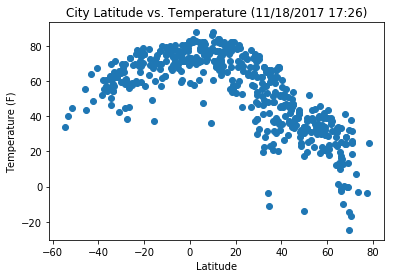

In [14]:
# Create scatter plot, and limits for axes
plt.scatter(weather_data["Latitude"], weather_data["Temperature"])
plt.ylim = (-50, 150)
plt.xlim = (-90, 90)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Temperature ({now.strftime('%m/%d/%Y %H:%M')})")

# Output the temperature scatter plot to file
plt.savefig("lat_vs_temperature.png")

# Output the scatter plot
plt.show()

### City Latitude vs. Humidity

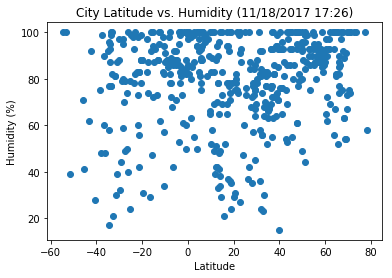

In [15]:
# Create scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"])
plt.ylim = (-50, 150)
plt.xlim = (-90, 90)

# Output the labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({now.strftime('%m/%d/%Y %H:%M')})")

# Output the temperature scatter plot to file
plt.savefig("lat_vs_humidity.png")

# Output the scatter plot
plt.show()

### City Latitude vs. Cloudiness

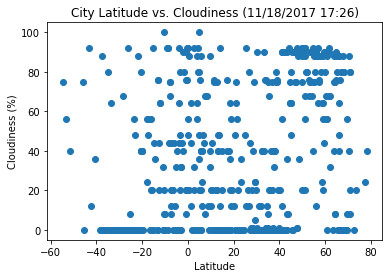

In [16]:
# Create scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"])
plt.ylim = (-50, 150)
plt.xlim = (-90, 90)

# Output plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%m/%d/%Y %H:%M')})")

# Output the temperature scatter plot to file
plt.savefig("lat_vs_cloudiness.png")

# Output the plot
plt.show()

### City Latitude vs. Wind Speed

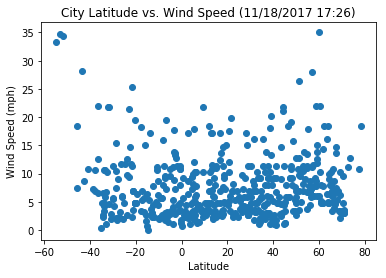

In [17]:
# Create scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"])
plt.ylim = (-50, 150)
plt.xlim = (-90, 90)

# Output labels and title for plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%m/%d/%Y %H:%M')})")

# Output the temperature scatter plot to file
plt.savefig("lat_vs_windspeed.png")

# Output the scatter plot
plt.show()